## **Heart Disease Prediction using Logistic Regression**

Heart disease is a common disease specially for aged people. There are some certain factors which cause angiographic disease. There are two csv files in kaggle (training and test). As we all know, data prepocessing, cleaning, feature selection and aggregation is very crucial to design a perfect model. Thus, I will try to do data preprocessing step by step and then Logistic Model will be used to train the dataset. Afterthat, as test dataset does not have class label, I will fit the test into training dataset and put a label whether they have heart disease or not.

### **Importing Libraries**

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sci
import matplotlib.pyplot as matplt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as matlab
%matplotlib inline

### **Loading Training Dataset**

In [41]:
heart_train = pd.read_csv("/home/samiulengineer/Desktop/sami/data/heart_train.csv")
heart_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


### **Changing Data Types**

Change all data types and convert all '?' values to Nan values

In [42]:
heart_train['Column4'] = pd.to_numeric(heart_train['Column4'], errors = 'coerce')
heart_train['Column5'] = pd.to_numeric(heart_train['Column5'], errors = 'coerce')
heart_train['Column6'] = pd.to_numeric(heart_train['Column6'], errors = 'coerce')
heart_train['Column7'] = pd.to_numeric(heart_train['Column7'], errors = 'coerce')
heart_train['Column8'] = pd.to_numeric(heart_train['Column8'], errors = 'coerce')
heart_train['Column9'] = pd.to_numeric(heart_train['Column9'], errors = 'coerce')
heart_train['Column10'] = pd.to_numeric(heart_train['Column10'], errors = 'coerce')
heart_train['Column11'] = pd.to_numeric(heart_train['Column11'], errors = 'coerce')
heart_train['Column12'] = pd.to_numeric(heart_train['Column12'], errors = 'coerce')
heart_train['Column13'] = pd.to_numeric(heart_train['Column13'], errors = 'coerce')

### **Changing Attributes Name**

In [43]:
heart_train.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 
                           'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 
                           'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels',
                           'Column13' : 'thal', 'Column14' : 'CVD'}, inplace = True)
heart_train.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal,CVD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


## **Dropout Attributes**

There are many missing values specially in **peak_exc, maj_vessels, thal** attributes. These three attributes will not give any meaningful model

In [44]:
heart_train = heart_train.fillna(heart_train.mean())

### **Changing Class Attributes**

angiographic_disease has 5 types of values (0 = No, 1,2,3,4 = Yes)<br>
Change all 1,2,3,4 values to 1 (1 = yes)

In [45]:
heart_train['CVD'] = (heart_train['CVD'] >= 1).astype(int)

### **Changing Data Types to Integer**

In [46]:
heart_train = heart_train.astype(int)

### **Implementing Logistic Regression and Fit the Model**

In [47]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = heart_train.iloc[:,:-1]
y = heart_train.iloc[:,-1]

# train_test_split will return the 4 array
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

# fit the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/samiulengineer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

I used to split 75% for tarining the model and 25% for testing the model

### **Model Accuracy**

In [48]:
# predict disease from x_test set
y_pred = logreg.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)

print('Accuracy of logistic Regression classifier on test set is: {}%'.format(round(accuracy,2)*100))

Accuracy of logistic Regression classifier on test set is: 78.0%


### **Total Number of 1 (yes) and 0 (no) Predictions**

In [49]:
y_pred_count = np.unique(y_pred, return_counts = True)
y_pred_count

(array([0, 1]), array([ 80, 115]))

Here model predicted in the test dataset (splitted from training dataset) 76 instaces have no angiographic disease, whereas 82 instances have it. 

### **Confusion Matrix**

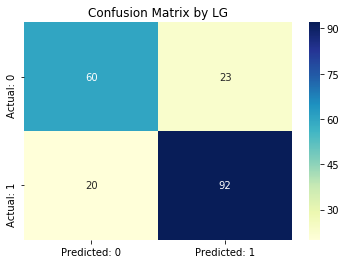

In [50]:
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cfmx, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

fig = sb.heatmap(data = conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu")
fig.set_title('Confusion Matrix by LG')

fig.get_figure().savefig('/home/samiulengineer/Desktop/sami/result_image/conf_matrix_lg.png')

### **Correct & Incorrect Prediction**

In [51]:
TN = cfmx[0,0]
TP = cfmx[1,1]
FN = cfmx[1,0]
FP = cfmx[0,1]

Total = TN + TP + FN + FP

print("The confusion matrix shows %i correct predictions and %i incorrect predictions" % ((TN + TP), (FN + FP)))

The confusion matrix shows 152 correct predictions and 43 incorrect predictions


### ***Specificity***

In [69]:
specificity = TN/(TN+FP)
specificity

0.7228915662650602

### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        83
           1       0.80      0.82      0.81       112

   micro avg       0.78      0.78      0.78       195
   macro avg       0.78      0.77      0.77       195
weighted avg       0.78      0.78      0.78       195



f1-score for 0 and 1 both cases are almost 0.80 which is impressive and a good indication of good model

### **ROC Curve Coverage Area**

In [53]:
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])

if roc_auc_score >= 0.70:
    print("ROC Curve Covers almost %i%% Area" % (round(roc_auc_score, 2)*100))
else:
     print("ROC Curve Covers almost %i%% Area Which is not Satisfactory" % (round(roc_auc_score, 2)*100))  

ROC Curve Covers almost 86% Area


### **ROC Curve**

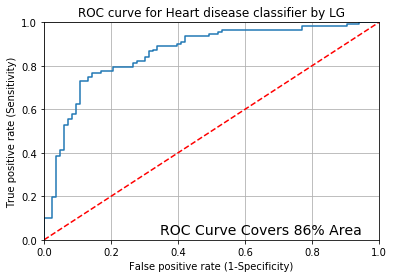

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

matplt.plot(fpr,tpr)
matplt.xlim([0.0, 1.0])
matplt.ylim([0.0, 1.0])
matplt.plot([0, 1], [0, 1], 'r--')
matplt.title('ROC curve for Heart disease classifier by LG')
matplt.xlabel('False positive rate (1-Specificity)')
matplt.ylabel('True positive rate (Sensitivity)')
matplt.grid(True)
matplt.text(0.95, 0.01, "ROC Curve Covers %i%% Area" % (round(roc_auc_score, 2)*100), verticalalignment='bottom', horizontalalignment = 'right', fontsize = 14)

matplt.savefig('/home/samiulengineer/Desktop/sami/result_image/roc_curve_lg.png')

### ***MCC***

In [62]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.5471526987336326

Red dot line is the essential factor. ROC curve must be to the upper left corner and make a good distance with red dotted line to make a perfect model.
In this case ROC curve is in almost perfect condition.

### **Loading Test Dataset**

In [55]:
heart_test = pd.read_csv("/home/samiulengineer/Desktop/sami/data/heart_test.csv")
heart_test.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


### **Checking Data Types**

In [56]:
heart_test.dtypes

Column1      int64
Column2      int64
Column3      int64
Column4     object
Column5     object
Column6     object
Column7      int64
Column8     object
Column9     object
Column10    object
Column11    object
Column12    object
Column13    object
dtype: object

### **Changing Data Types**

In [57]:
heart_test['Column4'] = pd.to_numeric(heart_test['Column4'], errors = 'coerce')
heart_test['Column5'] = pd.to_numeric(heart_test['Column5'], errors = 'coerce')
heart_test['Column6'] = pd.to_numeric(heart_test['Column6'], errors = 'coerce')
heart_test['Column8'] = pd.to_numeric(heart_test['Column8'], errors = 'coerce')
heart_test['Column9'] = pd.to_numeric(heart_test['Column9'], errors = 'coerce')
heart_test['Column10'] = pd.to_numeric(heart_test['Column10'], errors = 'coerce')
heart_test['Column11'] = pd.to_numeric(heart_test['Column11'], errors = 'coerce')
heart_test['Column12'] = pd.to_numeric(heart_test['Column12'], errors = 'coerce')
heart_test['Column13'] = pd.to_numeric(heart_test['Column13'], errors = 'coerce')

### **Changing Features Name & Delete Meaningless Features Same as Training Set**

In [58]:
heart_test.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 'Column5' : 'ser_chol',
                                         'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 'Column9' : 'exc_angina',
                                         'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels', 'Column13' : 'thal'}, inplace = True)

heart_test.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal
0,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN
1,61,1,4,148.0,203.0,0.0,0,161.0,0.0,0.0,1.0,1.0,7.0
2,54,1,4,130.0,242.0,0.0,0,91.0,1.0,1.0,2.0,NaN,NaN
3,48,1,4,120.0,260.0,0.0,0,115.0,0.0,2.0,2.0,NaN,NaN
4,57,0,1,130.0,308.0,0.0,0,98.0,0.0,1.0,2.0,NaN,NaN


### **Total Instances**

In [59]:
len(heart_test.index)

141

### **Checking Missing Values**

In [60]:
heart_test.isnull().sum()

age                 0
sex                 0
chest_pain_type     0
resting_bp         12
ser_chol            6
fast_glucose       12
rest_ecg            0
heart_rate         11
exc_angina         11
depression         13
peak_exc           47
maj_vessels        97
thal               78
dtype: int64

### **Checking Total Instances**

In [61]:
count = 0
for i in heart_test.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print("%i instances have missing values which is %i%% of the total data" % (count, round((float(count)/len(tubes2_HeartDisease_train.index))*100, 2)))

NameError: name 'tubes2_HeartDisease_train' is not defined

### **Dropout Missing Instances**

In [ ]:
heart_test = heart_test.fillna(heart_test.mean())

### **Checking Missing Value Again**

In [ ]:
heart_test.isnull().sum()

### **Changing Data Type to Integer**

In [ ]:
heart_test = heart_test.astype(int)
heart_test.head()

### **Predict the Angiographic Disease in Test Dataset**

In [ ]:
y_pred = logreg.predict(heart_test)

heart_test['CVD_predict'] = y_pred

heart_test.head()